In [2]:
from util import *

In [3]:
np = pca_dd("0.95548_per_1125.nc")
print(list(np))

[-1.7957734205160336, -2.4832257799548296, -6.518950693905748, -2.8716890588652095, -5.208429912253714, -1.8939349224180435, -2.211837703126254, -0.9219129507694348, -0.4203642737983837, -6.917585049477449, 1.0114212234853013, 4.309530142287708, -1.4154000343104505, 5.8887225960226735, -1.728333231354218, -0.3953315654001579, -1.311986426192005, -3.52117319655655, -2.768678539554144, 2.831811575392007, -0.9685200193952151, 2.91744554786807, -1.5589255333178458, -5.225812527578701, 0.7003509197313242, -2.5443162996837554, -5.090484528995176, -1.0200368279530765, -3.766734768839968, 3.8542476194380786, 1.8663605582645508, 3.201635529775394, 1.0106769168551193, 1.809287177408816, -4.481481330099257, -1.5731893849669127, -0.9298522171938908, -5.822129061587142, -2.7964681304752212, -2.0521914210352996, 3.0540597054958, -6.697304296331807, 3.4313218962524914, 2.473482385396798, 1.3423745178058568, 3.305570016478261, -5.14159557513977, -5.43097336446301, -2.709339432188396, -3.20624284769732

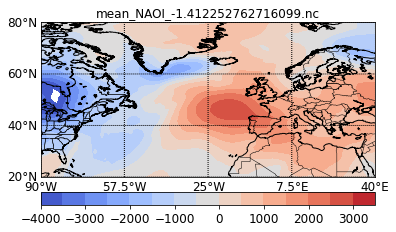

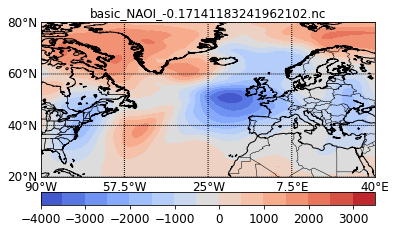

In [7]:
from plot import plot_nao
plot_nao(fileName = "NAOI_-1.412252762716099.nc",imgType="mean")
plot_nao(fileName = "NAOI_-0.17141183241962102.nc",imgType="basic")

# plot_nao(fileName = "NAOI_basic.nc",imgType="mean")



In [25]:
import re
valList = []
dnormList = []
switch = False
with open("log/process.txt",'r') as fr:
    for line in fr.readlines():
        matchObj = re.search(r"restart",line)
        if matchObj:
            switch = True
        if switch:
            matchObj = re.search(r"value = (-\d+\.\d*)",line)
            if matchObj:
                val = float(matchObj.group(1))
                valList.append(val)
                continue
            matchObj = re.search(r"dnorm = (.*)",line)       
            if matchObj:
                dnorm = float(matchObj.group(1))
                dnormList.append(dnorm)
dnormList.pop()
dnormList.insert(0,0)
dnormList.insert(1,1)
valList.insert(0,-1.2952838448663868)

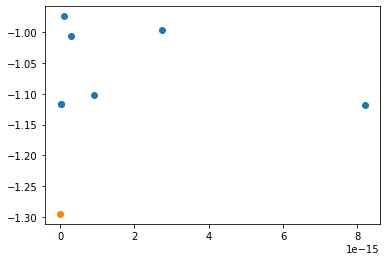

In [43]:
plt.plot(dnormList[32:],valList[32:],'o')
plt.plot(0,-1.2952838448663868,'o')
# plt.plot([0,2e-15], [-1.2952838448663868,-1]) 画线

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.show()



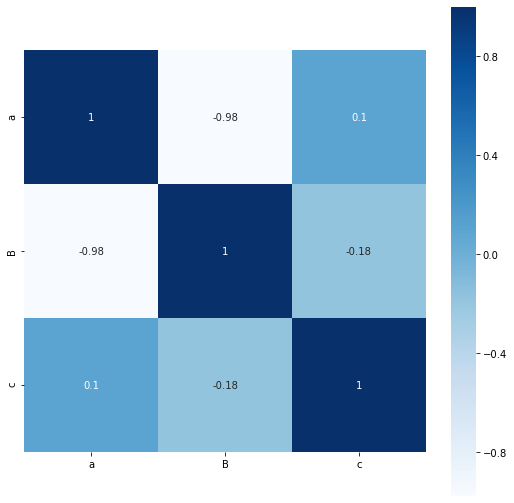

In [81]:
import numpy as np
import pandas as pd
a=np.array([[1, 1, 2, 2, 3],  
            [-2, -2, -3, -3, -5],  
            [1, 4, 2, 2, 3]])
df = pd.DataFrame(a.T)
df.columns=['a','B','c'] 
test(df)

Text(0.5, 1.0, 'f value in 21 iteration')

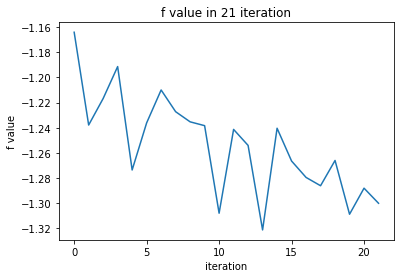

In [23]:
import matplotlib.pyplot as plt
def list_strip(li):
    tmp = 0
    for i in range(len(li)):
        if li[i] == 0:
            tmp = i
            break
    return li[:tmp]
fvalue = [-0.013970784223048566, -0.08787004298633597, -0.0667397382483513, -0.041315002143184065, -0.1236713461508828, -0.08617683547589569, -0.05994640289673275, -0.077244476783882, -0.08532544640741571, -0.08837695570541873, -0.15810226602776986, -0.09136591231193739, -0.10409982965786482, -0.17141183241962102, -0.09043073347321676, -0.11654115982272809, -0.12960381846164418, -0.13622357812894717, -0.11609842097498016, -0.1589200454207855, -0.13817417703791626, -0.1501939712991002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

fvalue = list_strip(fvalue)
for i in range(len(fvalue)):
    fvalue[i] = fvalue[i] - 1.15
plt.plot(range(len(fvalue)), fvalue)
plt.xlabel("iteration")
plt.ylabel("f value")
plt.title("f value in 21 iteration")


Text(0.5, 1.0, 'constrained optimization')

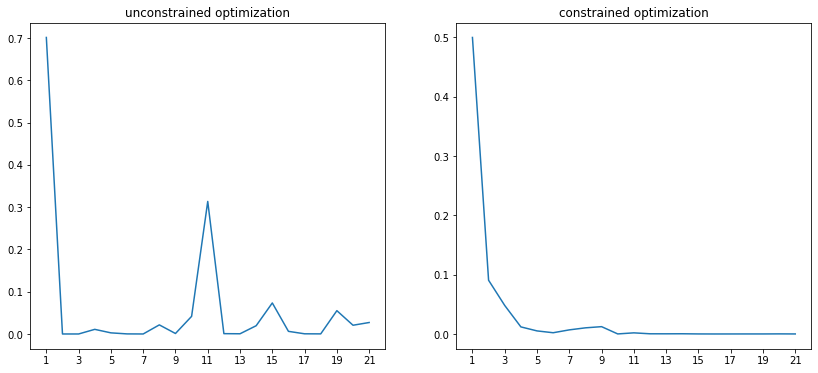

In [91]:
import json,re
import numpy as np

def get_x(fileName):
    xList = []
    with open("log/"+fileName,'r') as fr:
        for line in fr.readlines():
            matchObj = re.search(r"^x =",line)
            if not matchObj is None:
                tmp = line.split("=")[1].strip()
                xList.append(json.loads(tmp))
    return xList

def get_interval(name):
    xList = get_x(name)
    xInterval = [np.array(xList[i+1])-np.array(xList[i]) for i in range(len(xList)-1) ]
    xInterval = list(map(lambda x:np.linalg.norm(x,np.inf),xInterval))
    return xInterval

my_x_ticks = np.arange(1, 22, 2)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 6))

xInterval = get_interval("result_min_1110_0.01_42.txt")    
ax2.set_xticks(my_x_ticks)
ax1.set_xticks(my_x_ticks)

ax1.plot(range(1,22), xInterval[:21])
ax1.set_title("unconstrained optimization")
xInterval = get_interval("result_min_1110.txt")    
ax2.plot(range(1,22), xInterval)
ax2.set_title("constrained optimization")





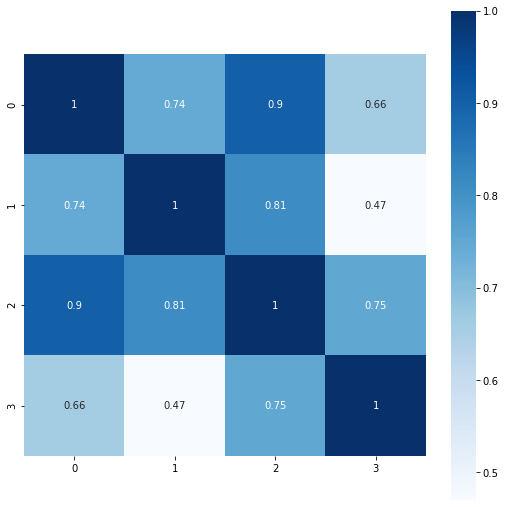

In [90]:
import pandas as pd
gradients = []
with open("log/gradient.out",'r') as fr:
    for line in fr.readlines():
        gradients.append(json.loads(line.strip()))
df = pd.DataFrame(np.array(gradients[8:]).T)
test(df)


Text(0, 0.5, 'line search iteration')

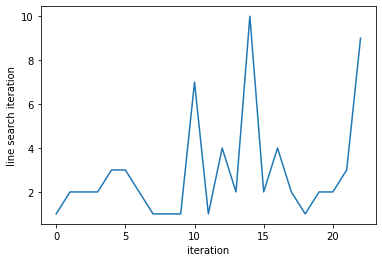

In [116]:
def get_LS_num(fileName):
    countList = [0 for i in range(50)]
    with open("log/"+fileName,'r') as fr:
        for line in fr.readlines():
            matchObj = re.search(r"func start \((\d+)\)",line)
            if not matchObj is None:
                tmp = matchObj.group(1)
                countList[int(tmp)] += 1
    return countList

ctList = get_LS_num("process.txt")
clist = list_strip(ctList)
plt.plot(range(len(clist)),clist)
plt.xlabel("iteration")
plt.ylabel("line search iteration")
